In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
%matplotlib inline
import folium #visualize spatial data in an interactive manner
import folium.plugins

### Part 1: Data Exploration

In [2]:
data_filename = r'data\nyc_data.csv'
data = pd.read_csv(data_filename, 
                   parse_dates=['pickup_datetime', 'dropoff_datetime'] )
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


In [3]:
fare = pd.read_csv(r'data\nyc_fare.csv')
fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,2013-01-01 00:00:00,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,2013-01-01 00:05:00,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,2013-01-01 00:05:52,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,2013-01-01 00:06:00,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,2013-01-01 00:06:00,CSH,6.5,0.5,0.5,0.0,0.0,7.5


In [4]:
fare.dtypes

medallion           object
hack_license        object
vendor_id           object
pickup_datetime     object
payment_type        object
fare_amount        float64
surcharge          float64
mta_tax            float64
tip_amount         float64
tolls_amount       float64
total_amount       float64
dtype: object

In [5]:
#change 'pickup_datetime' from 'object' to 'datetime64' type
fare['pickup_datetime'] =  pd.to_datetime(fare['pickup_datetime'], format='%Y-%m-%d')

In [6]:
df = pd.merge(data, fare,  how='inner', left_on=['medallion','hack_license','vendor_id','pickup_datetime'], right_on = ['medallion','hack_license','vendor_id','pickup_datetime'])
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,...,40.781887,-73.963181,40.777832,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,...,40.745735,-73.964943,40.755722,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,...,40.799770,-73.954567,40.787392,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,...,40.755081,-73.991417,40.755085,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,...,40.773716,-73.955399,40.782597,CSH,6.5,0.5,0.5,0.0,0.0,7.5


In [7]:
print(df.shape)
df.info()

(846945, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 846945 entries, 0 to 846944
Data columns (total 21 columns):
medallion             846945 non-null object
hack_license          846945 non-null object
vendor_id             846945 non-null object
rate_code             846945 non-null int64
store_and_fwd_flag    424577 non-null object
pickup_datetime       846945 non-null datetime64[ns]
dropoff_datetime      846945 non-null datetime64[ns]
passenger_count       846945 non-null int64
trip_time_in_secs     846945 non-null int64
trip_distance         846945 non-null float64
pickup_longitude      846945 non-null float64
pickup_latitude       846945 non-null float64
dropoff_longitude     846945 non-null float64
dropoff_latitude      846945 non-null float64
payment_type          846945 non-null object
fare_amount           846945 non-null float64
surcharge             846945 non-null float64
mta_tax               846945 non-null float64
tip_amount            846945 non-null float64

In [8]:
#check the numeric variables statistics
df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000,846945.000000,846945.000000,846945.000000,846945.00000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967,12.190578,0.320303,0.499305,1.34466,0.232142,14.587073
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766,9.514150,0.772642,0.057844,2.09149,1.109164,11.380950
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911,-648.420000,-1.000000,-0.500000,0.00000,0.000000,-52.500000
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207,6.500000,0.000000,0.500000,0.00000,0.000000,8.000000
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597,9.500000,0.000000,0.500000,1.00000,0.000000,11.000000
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227,14.000000,0.500000,0.500000,2.00000,0.000000,16.500000
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592,620.010000,628.840000,41.490000,200.00000,100.660000,620.010000


In [9]:
#remove duplicate rows
df = df.drop_duplicates()

I googled and found that "Latitudes range from -90 to 90, Longitudes range from -180 to 180.
so the columns 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude' are good. 
For the two columns 'fare_amount' and 'total_amount', I will mainly analyze 'total_amount' according to the meaning of 
two columns. 
'total_amount': the total amount charged to passengers.
'fare_amount': the time-and-distance' fare calculated by the meter.
And I also found that many columns have negative values which does not make sense.

In [10]:
df1 = df.copy()
df1 = df1[df1['total_amount']>=0] #remove negative value in 'total_amount' column
df1 = df1[df1['trip_time_in_secs']>=0] #remove negative value in 'trip_time_in_secs' column
df1 = df1[df1['fare_amount']>=0] #remove negative value in 'fare_amount' column
df1 = df1[df1['surcharge']>=0] #remove negative value in 'surcharge' column
df1 = df1[df1['mta_tax']>=0] #remove negative value in 'mta_tax' column

In [11]:
print('Old size: %d' % len(df),'; New size: %d' % len(df1))

Old size: 846945 ; New size: 846927


In [13]:
#dealing with missing values
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df = pd.DataFrame({'column_name': df1.columns,
                                 'percent_missing': percent_missing})
missing_value_df.reset_index(drop=True)

,column_name,percent_missing
0,medallion,0.000000
1,hack_license,0.000000
2,vendor_id,0.000000
3,rate_code,0.000000
4,store_and_fwd_flag,49.868643
5,pickup_datetime,0.000000
6,dropoff_datetime,0.000000
7,passenger_count,0.000000
8,trip_time_in_secs,0.000000
9,trip_distance,0.000000


In [14]:
#since the missing value percentage of column 'store_and_fwd_flag' is about 50%, I will drop this 
#column which indicates whether the trip record was held in vehicle memory before sending to the vendor.
df1 = df1.drop('store_and_fwd_flag',axis=1)

<Figure size 432x288 with 0 Axes>

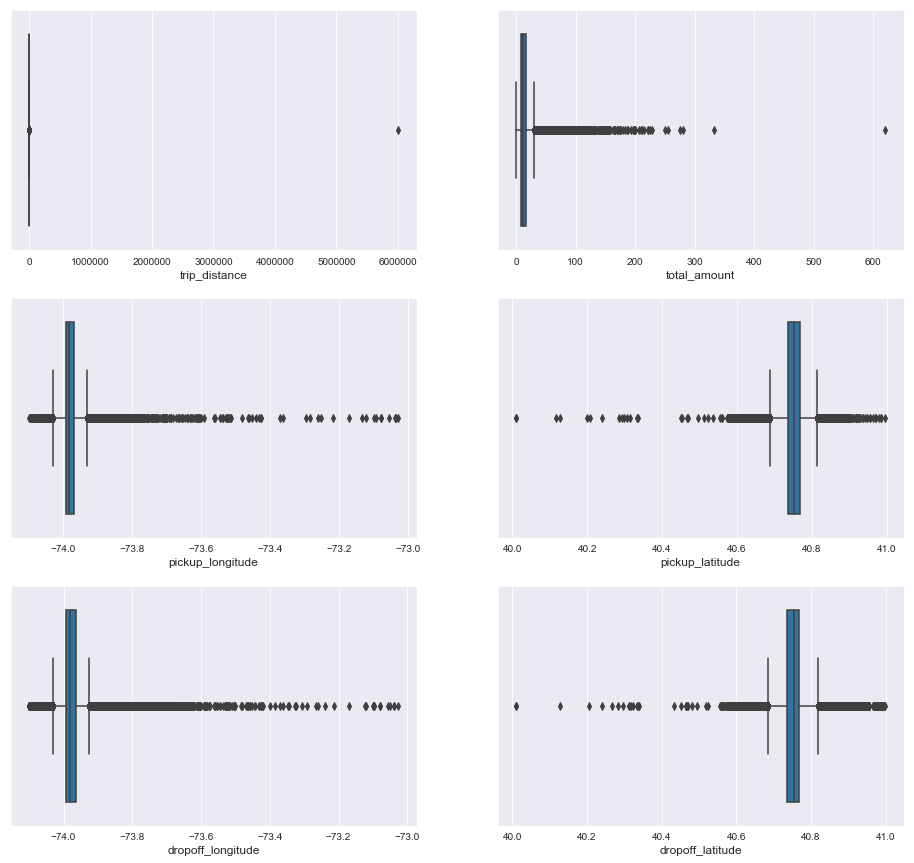

In [15]:
#Identify outliers
var = ['trip_distance','total_amount','pickup_longitude','pickup_latitude',
       'dropoff_longitude','dropoff_latitude']
i=0
sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(3, 2, figsize = (16, 15))
for col in var:
    i += 1
    plt.subplot(3,2,i)
    sns.boxplot(x=df1[col])
    plt.xlabel(col, fontsize = 12)   

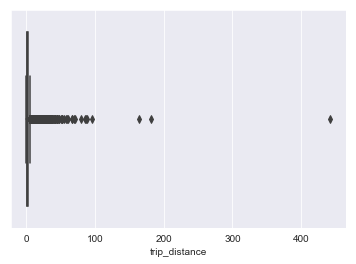

In [16]:
# Remove the trip_distance records of over 6,000,000 miles
df2 = df1.copy()
df2 = df2[(df2['trip_distance']) < 6000000].reset_index(drop=True)
# And check the distribution
sns.boxplot(x = df2['trip_distance'])

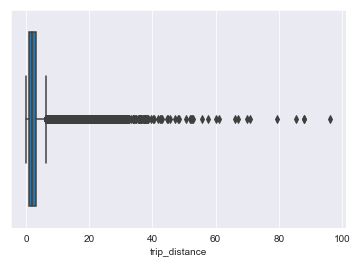

In [17]:
# Remove the values over 100 miles
df2 = df2[(df2['trip_distance']) < 100].reset_index(drop=True)
# And then check the distribution again
sns.boxplot(x = df2['trip_distance'])

In [18]:
df2 = df2[(df2['total_amount']) < 300].reset_index(drop=True)

<Figure size 432x288 with 0 Axes>

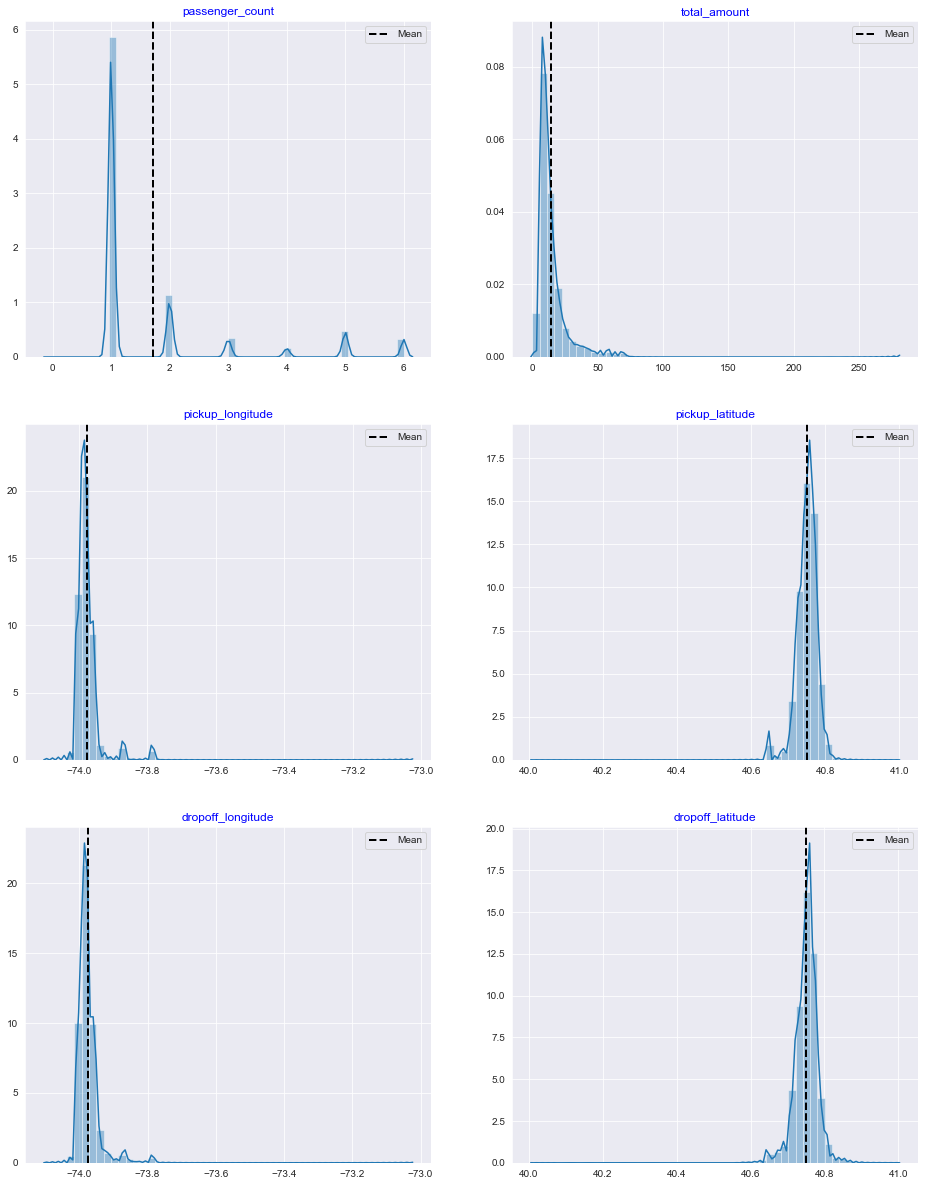

In [19]:
# Plot the distributions of 'passenger_count','total_amount','pickup_longitude','pickup_latitude',
#'dropoff_longitude','dropoff_latitude'
var = ['passenger_count','total_amount','pickup_longitude','pickup_latitude',
       'dropoff_longitude','dropoff_latitude']
i = 0

sns.set_style("darkgrid")
plt.figure()
fig, ax = plt.subplots(3,2, figsize = (16, 21))
for col in var:
    i += 1
    plt.subplot(3, 2, i)
    sns.distplot(df2[col])
    plt.axvline(df2[col].mean(),linewidth  = 2 ,
                linestyle = "dashed",color = "k" ,
                label = "Mean")
    plt.legend(loc = "best")
    plt.title(col,color = "b")
    plt.xlabel("")  

# The distribution plots clearly tell that:
# 1) Most of toal amount centers within [0,50] interval.
# 2) The majority of the passenger_count is 1 which means there was only one passenger in most cases

For categorical variables, check the frequencies of "vendor_id","rate_code"

In [21]:
#Display categorical variable frequencies
obj = df2.columns[df2.dtypes=="object"]
df2[obj].describe()

,medallion,hack_license,vendor_id,payment_type
count,846921,846921,846921,846921
unique,13446,38391,2,5
top,E8260A241D62ECC156ECB8AD607E1E6B,03173DD93C1171DA1788E6E7D733C5A9,CMT,CRD
freq,125,97,424672,456017


In [22]:
#for categorical variables, check the frequencies of "vendor_id", "rate_code"
vendor_id_tab = pd.crosstab(index=df2["vendor_id"],columns="count")
vendor_id_tab.columns.name = None
vendor_id_tab = vendor_id_tab.reset_index()
vendor_id_tab
 
#From the result below, we can find that these two vendors have almost euqal shares in NYC yellow taxi market.

,vendor_id,count
0,CMT,424672
1,VTS,422249


In [23]:
#check the frequency of column 'rate_code'
rate_code_tab = pd.crosstab(index=df2["rate_code"],columns="count")
rate_code_tab.columns.name = None
rate_code_tab = rate_code_tab.reset_index()
rate_code_tab

# The majority of the trips in the dataset is "standard rate"(rate_code as 1), 
# then the trips to JFK airport comes second (rate_code as 2)

,rate_code,count
0,0,118
1,1,830006
2,2,14733
3,3,121
4,4,533
5,5,1395
6,6,15


### Part 2: Feature Engineering

In [24]:
df2['Year'] = df2['pickup_datetime'].dt.year
df2['Month'] = df2['pickup_datetime'].dt.month
df2['Day'] = df2['pickup_datetime'].dt.day
df2['Day_of_Week'] = df2['pickup_datetime'].dt.dayofweek
df2['Hour'] = df2['pickup_datetime'].dt.hour

In [25]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df2['Day_of_Week'] = df2['Day_of_Week'].map(dayOfWeek)

In [26]:
nameOfmonth={1:"JAN",2:"FEB",3:"MAR",4:"APR",5:"MAY",6:"JUN",
             7:"JUL",8:"AUG",9:"SEP",10:"OCT",11:"NOV",12:"DEC"}
df2["Name_of_Month"] = df2["Month"].map(nameOfmonth)

In [27]:
df2.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,mta_tax,tip_amount,tolls_amount,total_amount,Year,Month,Day,Day_of_Week,Hour,Name_of_Month
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,...,0.5,0.0,0.0,6.0,2013,1,1,Tuesday,0,JAN
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,...,0.5,2.8,0.0,17.3,2013,1,1,Tuesday,0,JAN
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,...,0.5,0.0,0.0,8.5,2013,1,1,Tuesday,0,JAN
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,...,0.5,0.0,0.0,3.5,2013,1,1,Tuesday,0,JAN
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,...,0.5,0.0,0.0,7.5,2013,1,1,Tuesday,0,JAN


#### Question 1: Does the number of passengers affect the fare?

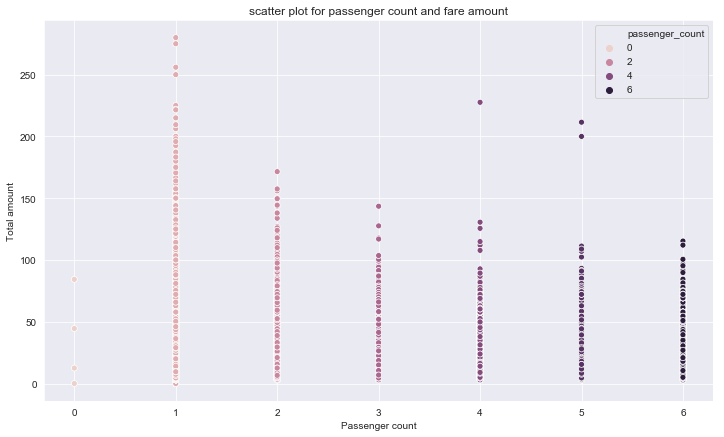

In [28]:
plt.figure(figsize = (12,7))
sns.scatterplot(x="passenger_count", y="total_amount", data=df2, hue="passenger_count")
plt.ylabel("Total amount")
plt.xlabel("Passenger count")
plt.title("scatter plot for passenger count and fare amount")
plt.show()

From the graph, we can see that single passengers are the most frequent customers and the highest fare also comes from cabs which carry just 1 passenger.

#### Question 2: Does the date and time of pickup affect the fare?

In [29]:
avg_fare_hour = df2.groupby("Hour")["total_amount"].mean().reset_index()

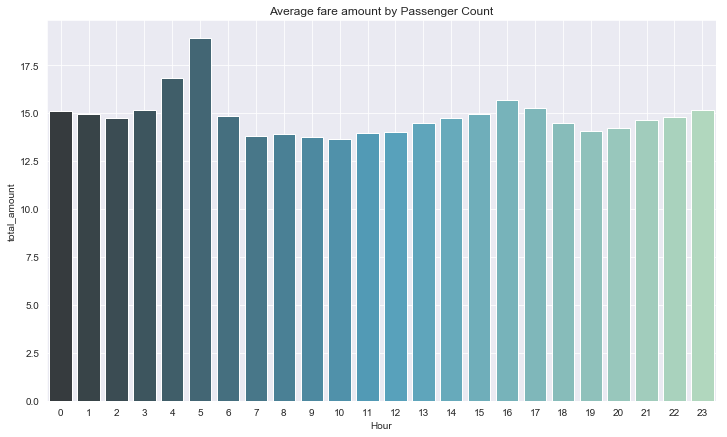

In [30]:
plt.figure(figsize = (12,7))
sns.barplot(x='Hour', y='total_amount',
             data = avg_fare_hour,palette = "GnBu_d",
             linewidth =1)
plt.grid(True)
plt.title("Average fare amount by Passenger Count")
plt.show()

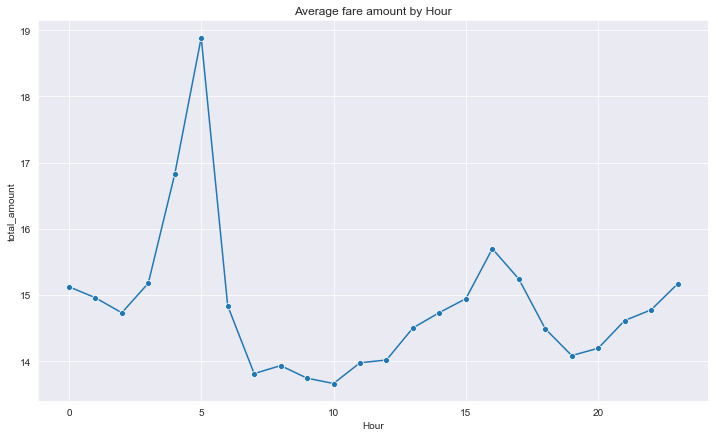

In [31]:
plt.figure(figsize = (12,7))
sns.lineplot(x='Hour', y='total_amount',marker="o", 
             dashes=False, data= avg_fare_hour)
plt.grid(True)
plt.title("Average fare amount by Hour")
plt.show()

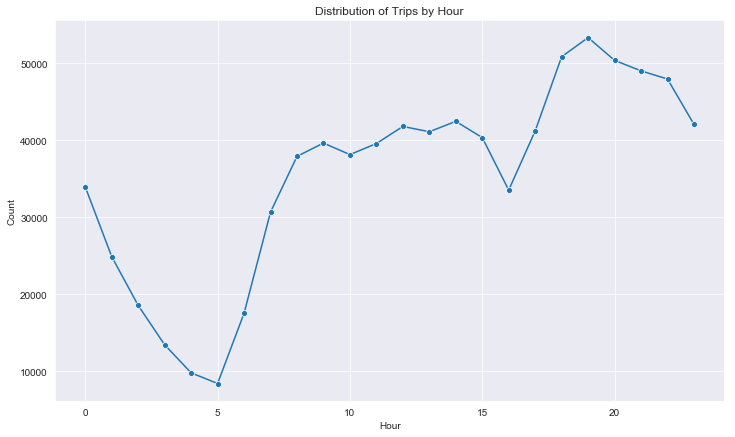

In [32]:
trips_hour=df2['Hour'].value_counts().reset_index()
trips_hour.columns = ["Hour","Count"]
trips_hour = trips_hour.sort_values(by = "Hour",ascending = True)
plt.figure(figsize = (12,7))
sns.lineplot(x='Hour', y='Count', marker="o", 
             dashes=False, data= trips_hour)
plt.grid(True)
plt.title("Distribution of Trips by Hour")
plt.show()

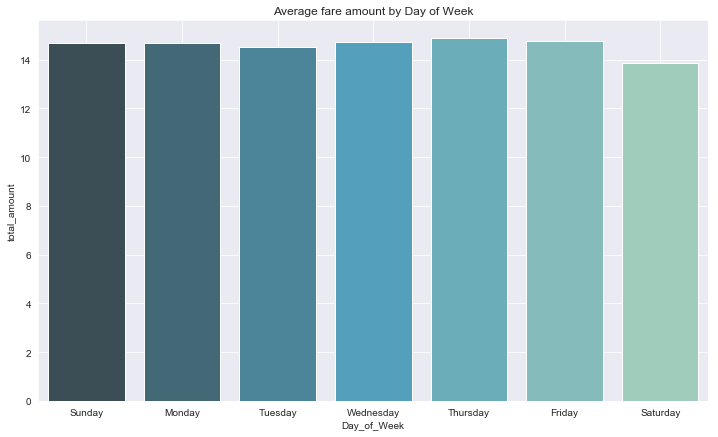

In [33]:
#Average Fare Amount by Day of Week
avg_fare_week = df2.groupby("Day_of_Week")["total_amount"].mean().reset_index()
wk_ord = ["Sunday" ,'Monday' , 'Tuesday','Wednesday',
          'Thursday' ,'Friday', 'Saturday']
plt.figure(figsize = (12,7))
sns.barplot(x='Day_of_Week', y='total_amount',
             data = avg_fare_week,order=wk_ord, palette = "GnBu_d",
             linewidth =1)
plt.grid(True)
plt.title("Average fare amount by Day of Week")
plt.show()

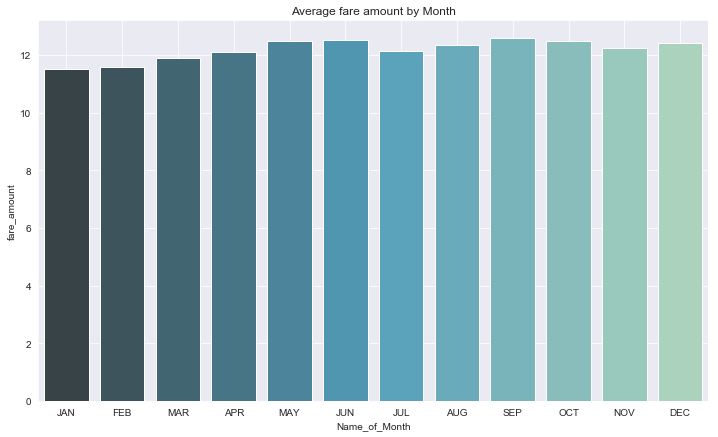

In [34]:
#Average Fare Amount by Month
avg_fare_month = df2.groupby("Name_of_Month")["fare_amount"].mean().reset_index()
month_order = ['JAN', 'FEB', 'MAR','APR', 'MAY' , 'JUN',
                'JUL',  'AUG', 'SEP','OCT', 'NOV','DEC']
plt.figure(figsize = (12,7))
sns.barplot(x='Name_of_Month', y='fare_amount',
             data = avg_fare_month, order=month_order, palette = "GnBu_d",linewidth =1)
plt.grid(True)
plt.title("Average fare amount by Month")
plt.show()

### Part 3: Scatterplot for Pickup Locations

In [36]:
# Get the actual coordinates: four DataFrame columns These four variables are all Series objects:
p_lng = df2.pickup_longitude
p_lat = df2.pickup_latitude
d_lng = df2.dropoff_longitude
d_lat = df2.dropoff_latitude

In [37]:
# a Series is an indexed list of values.
p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [38]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [39]:
# Get pickup coordinates from pickup latitude and longitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
py.head()

0   -37.572749
1   -37.586007
2   -37.566187
3   -37.582580
4   -37.575746
Name: pickup_latitude, dtype: float64

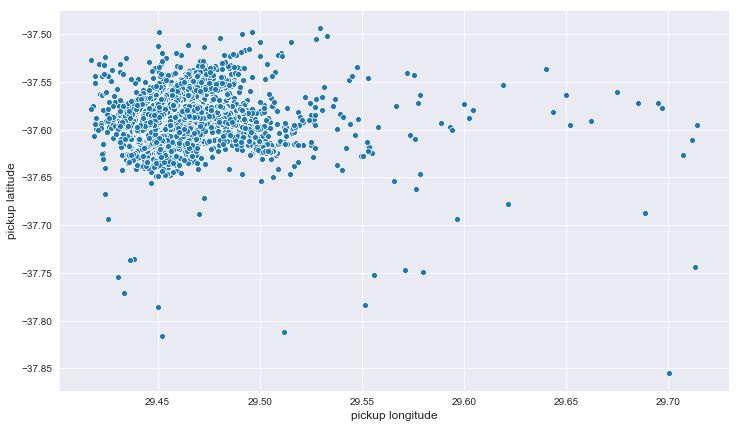

In [40]:
plt.figure(figsize=(12,7))
sns.scatterplot(px, py)
plt.ylabel("pickup latitude", size=12)
plt.xlabel("pickup longitude", size=12)
plt.show()

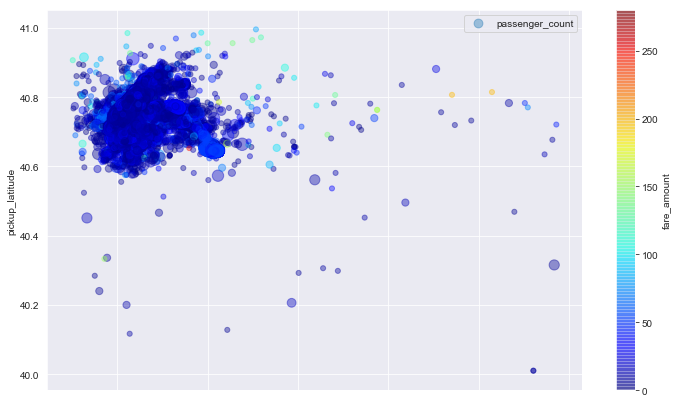

In [41]:
df2.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude",
    s=df2['passenger_count']*26, label="passenger_count",
    c="fare_amount", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(12,7),
)
plt.legend()
plt.show()

#### Exploration for pickup locations in JFK Airport

In [43]:
JFK_data=df2[df2['rate_code']==2]

lat_center_jfk = 40.645626
lon_center_jfk = -73.785220

map_jfk_pk = folium.Map(location=[lat_center_jfk,lon_center_jfk],
                         tiles="OpenStreetMap",
                         max_zoom=15,zoom_start=15)

folium.Marker(location = [lat_center_jfk,lon_center_jfk],
              icon = folium.Icon( icon="star",color = "blue")).add_to(map_jfk_pk)

#plotting 2500 data points
for i in range(0,len(JFK_data[:2500])) :
    p = [JFK_data["pickup_latitude"][:2500].values[i],
        JFK_data["pickup_longitude"][:2500].values[i]]
    
    folium.Circle(location = p ,radius = 2,
                  color = "red").add_to(map_jfk_pk)
    

map_jfk_pk

In [44]:
map_jfk_dp = folium.Map(location=[lat_center_jfk,lon_center_jfk],
                        tiles="OpenStreetMap",
                        max_zoom=15,zoom_start=15)

folium.Marker(location = [lat_center_jfk,lon_center_jfk],
              icon = folium.Icon( icon="star",color = "blue")).add_to(map_jfk_dp)

#plotting 2500 dta points
for i in range(0,len(JFK_data[:2500])) :
    p = [JFK_data["dropoff_latitude"][:2500].values[i],
        JFK_data["dropoff_longitude"][:2500].values[i]]
    
    folium.Circle(location = p ,radius = 5,
                  color = "blue").add_to(map_jfk_dp)
    

map_jfk_dp

#### Question 3: For which vendor is it easiest to find a cab?

In [63]:
vendor_grouped = df2['pickup_latitude'].groupby(df2['vendor_id']).agg(['count'])
vendor_grouped.reset_index()

,vendor_id,count
0,CMT,424672
1,VTS,422249


From the graph, we can see that there is no much diffference between these two vendors to find a cab. If we have to strictly precise, the CMT is easier to find a cab since it has more pickup locations than vendor VTS. And we can obtain the same conclusion through the graphs below.

In [64]:
# To compare the pickup location distribution of the two vendors, I split them into two subsets by vendors.
CMT = df2[(df2['vendor_id']) == 'CMT'].reset_index(drop=True)
VTS = df2[(df2['vendor_id']) == 'VTS'].reset_index(drop=True)
# Get the pickup locations of CMT
CMT_p_lng = CMT.pickup_longitude
CMT_p_lat = CMT.pickup_latitude
# Get the pickup locations of VTS
VTS_p_lng = VTS.pickup_longitude
VTS_p_lat = VTS.pickup_latitude

(29.4, 29.55, -37.63, -37.54)

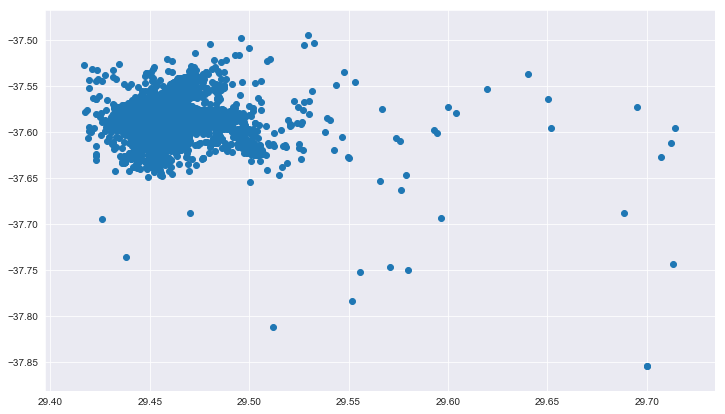

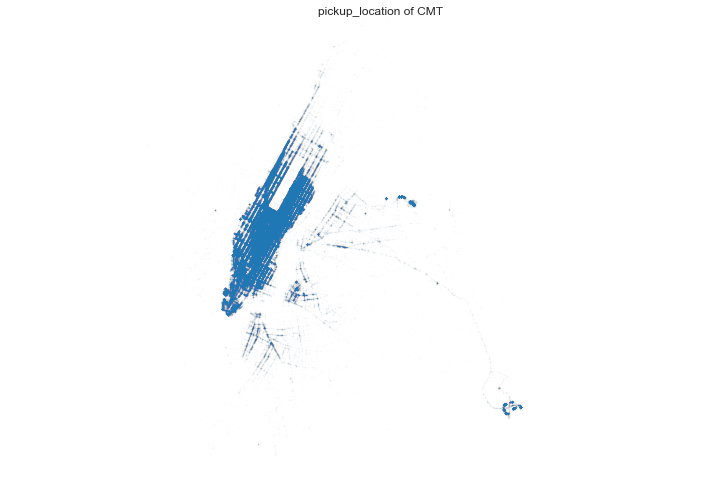

In [65]:
# Draw the first scatter plot: the pickup locations of CMT
plt.figure(figsize=(12, 7))
px1, py1 = lat_lng_to_pixels(CMT_p_lat, CMT_p_lng)
plt.scatter(px1, py1)
plt.figure(figsize=(12, 8))
plt.scatter(px1, py1, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.title('pickup_location of CMT')
plt.axis('off')

(29.4, 29.55, -37.63, -37.54)

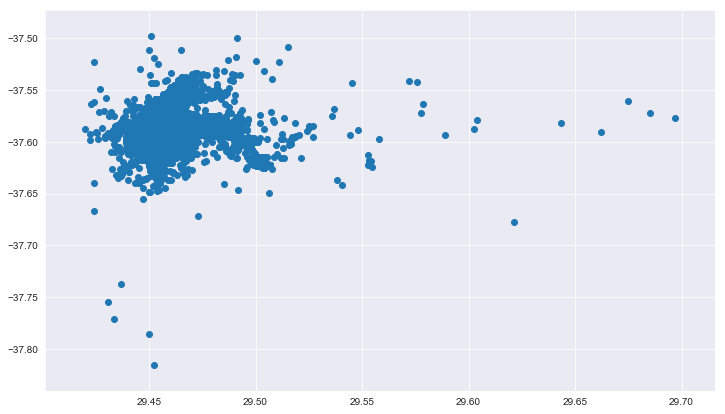

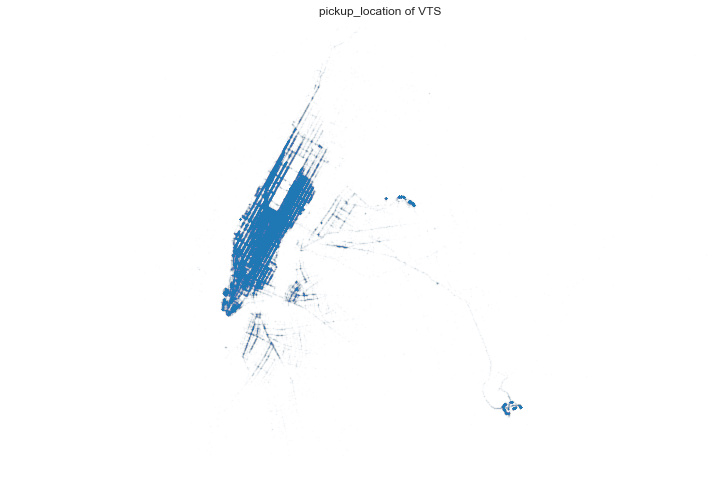

In [66]:
# Draw the second scatter plot: the pickup locations of VTS
plt.figure(figsize=(12, 7))
px2, py2 = lat_lng_to_pixels(VTS_p_lat, VTS_p_lng)
plt.scatter(px2, py2)
plt.figure(figsize=(12, 8))
plt.scatter(px2, py2, s=.1, alpha=0.03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.title('pickup_location of VTS')
plt.axis('off')

Comparing these two graphs, we found that the pickup locations of CMT are more distributed than VTS. So I think that it is easier for users to find a cab of vendor CMT.

### Part 3: Display a histogram of trip distances

In [67]:
bin_array = np.linspace(start=0., stop=10., num=100)
bin_array

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

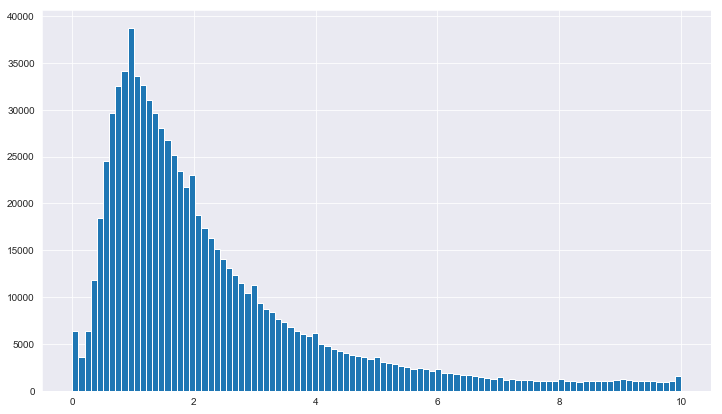

In [68]:
plt.figure(figsize=(12, 7))
df2.trip_distance.hist(bins=bin_array)

In [69]:
#The most common trip distance
df2['trip_distance'].value_counts().idxmax()

1.0

From the graph, we can see that 1.0 mile is the most common trip distance.

### Part 4: Display a histogram of the fare amount

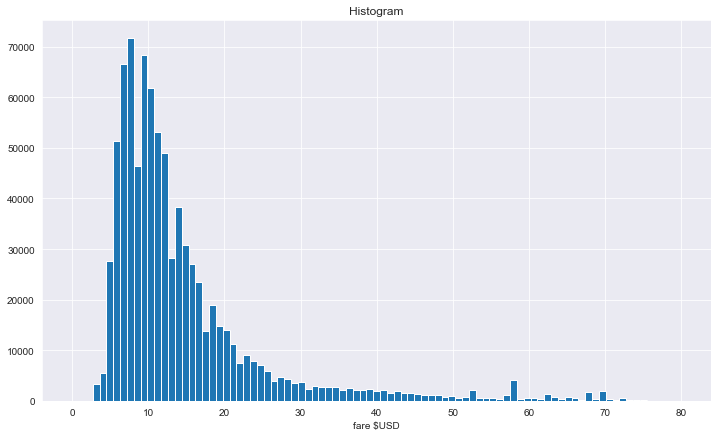

In [73]:
plt.figure(figsize=(12, 7))
bin_array = np.linspace(start=0, stop=80, num=90)
df2.total_amount.hist(bins=bin_array)
plt.xlabel('fare $USD')
plt.title('Histogram');

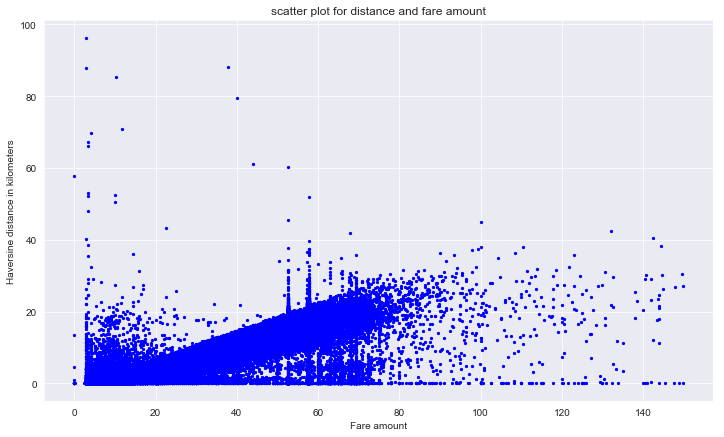

In [75]:
#Draw a scatterplot of trip distance and fare amount less than 150 $
plt.figure(figsize = (12,7))
amount_less_than_150 = df2[df2.total_amount<150]
plt.scatter(amount_less_than_150["total_amount"],
            amount_less_than_150["trip_distance"],s = 5,
            linewidths=1, c = "b")
plt.ylabel("Haversine distance in kilometers")
plt.xlabel("Fare amount")
plt.title("scatter plot for distance and fare amount")
plt.show()

In [77]:
df2['total_amount'].value_counts().idxmax()

9.0

From the result, we can see that the common fares for the trip focus around 5 to 15 dollars, and based on calculation result, the most common fare is 9 dollars that apprear most frequently. And the highest fare is close to 80 dollars.